## Use sns.load_dataset('titanic') dataset to do survival prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# class same as pclass, embark same as embark_town, alive same as survived, who gives the details about adult_male
df.drop(columns=['class','embark_town','alive','adult_male'],axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,NaN,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   who       891 non-null    object  
 9   deck      203 non-null    category
 10  alone     891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.9+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis
- Categorical

In [6]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

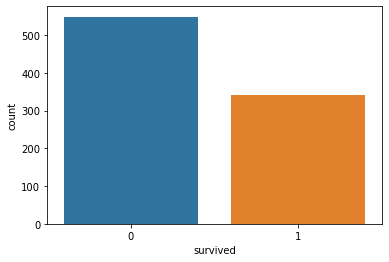

In [7]:
sns.countplot(x='survived',data=df)

In [8]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

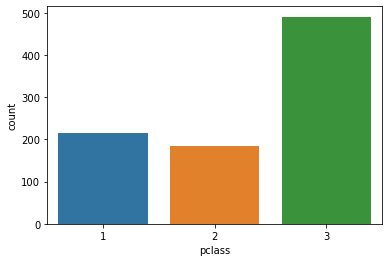

In [9]:
sns.countplot(x='pclass',data=df)

In [10]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

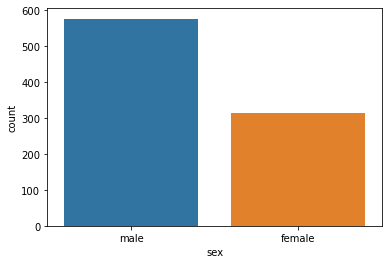

In [11]:
sns.countplot(x='sex',data=df)

In [12]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

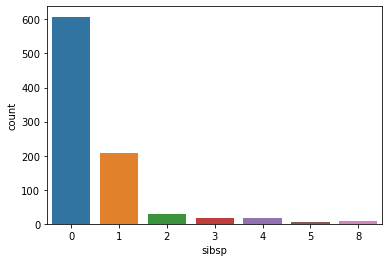

In [13]:
sns.countplot(x='sibsp',data=df)

In [14]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

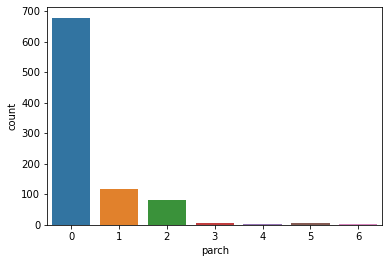

In [15]:
sns.countplot(x='parch',data=df)

In [16]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

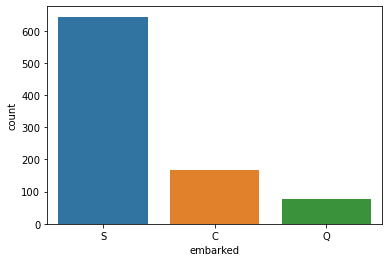

In [17]:
sns.countplot(x='embarked',data=df)

In [18]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

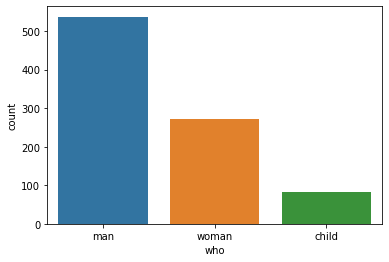

In [19]:
sns.countplot(x='who',data=df)

In [20]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [21]:
print(df['deck'].value_counts().sum())

203


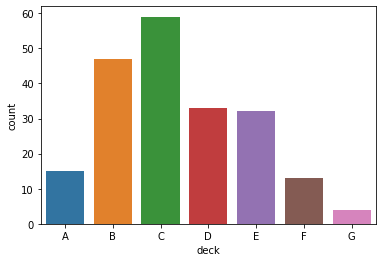

In [22]:
sns.countplot(x='deck',data=df)

In [23]:
df['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

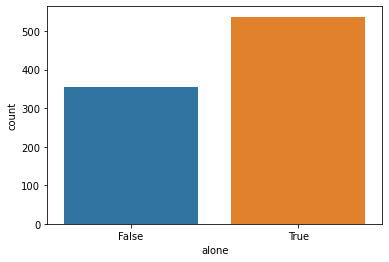

In [24]:
sns.countplot(x='alone',data=df)

- Continuous

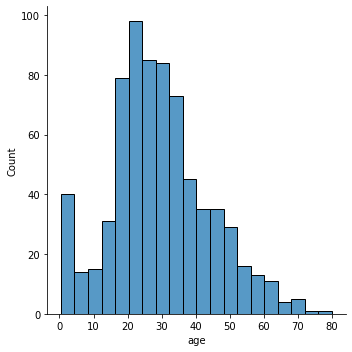

In [25]:
sns.displot(x='age',data=df)

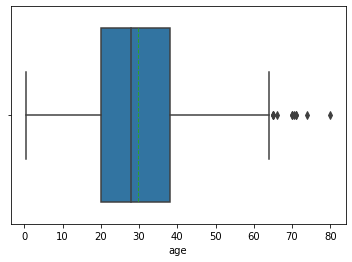

In [26]:
sns.boxplot(x='age',data=df,showmeans=True,meanline=True,showfliers=True)

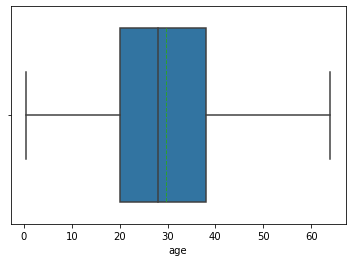

In [27]:
sns.boxplot(x='age',data=df,showmeans=True,meanline=True,showfliers=False)

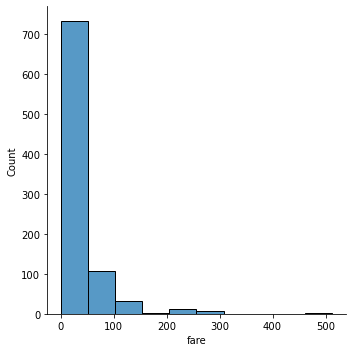

In [28]:
sns.displot(x='fare',data=df,bins=10)

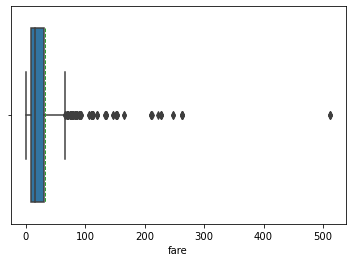

In [29]:
sns.boxplot(x='fare',data=df,showmeans=True,meanline=True,showfliers=True)

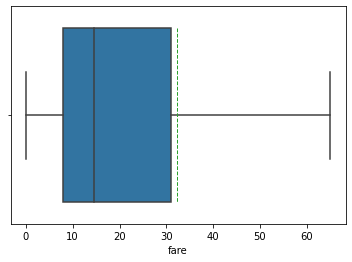

In [30]:
sns.boxplot(x='fare',data=df,showmeans=True,meanline=True,showfliers=False)

### Bivariate Analysis
- cat vs cat

In [31]:
df.reset_index(inplace=True)

   survived  pclass  Count
0         0       1     80
1         0       2     97
2         0       3    372
3         1       1    136
4         1       2     87
5         1       3    119


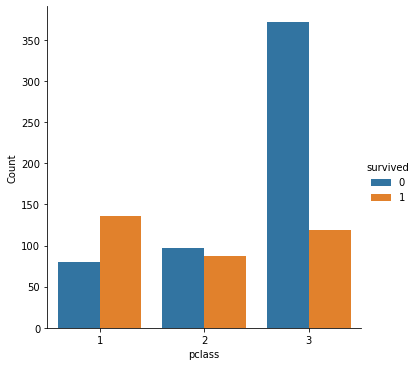

In [32]:
d = df.groupby(by = ['survived',"pclass"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='pclass',y='Count',hue='survived',data=d,kind='bar')

   survived     sex  Count
0         0  female     81
1         0    male    468
2         1  female    233
3         1    male    109


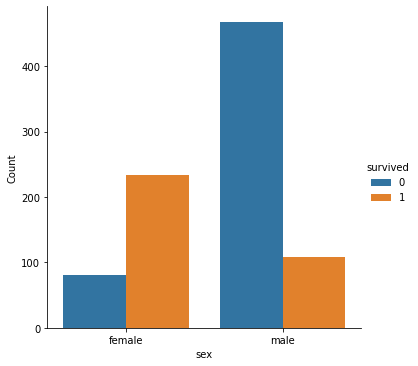

In [33]:
d = df.groupby(by = ['survived',"sex"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='sex',y='Count',hue='survived',data=d,kind='bar')

    survived  sibsp  Count
0          0      0    398
1          0      1     97
2          0      2     15
3          0      3     12
4          0      4     15
5          0      5      5
6          0      8      7
7          1      0    210
8          1      1    112
9          1      2     13
10         1      3      4
11         1      4      3


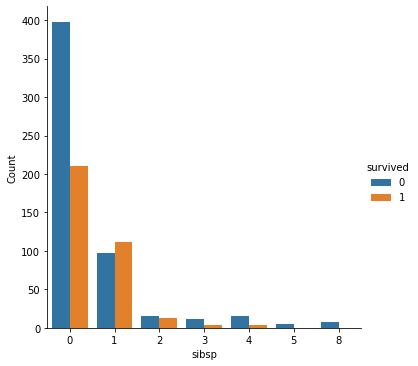

In [34]:
d = df.groupby(by = ['survived',"sibsp"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='sibsp',y='Count',hue='survived',data=d,kind='bar')

    survived  parch  Count
0          0      0    445
1          0      1     53
2          0      2     40
3          0      3      2
4          0      4      4
5          0      5      4
6          0      6      1
7          1      0    233
8          1      1     65
9          1      2     40
10         1      3      3
11         1      5      1


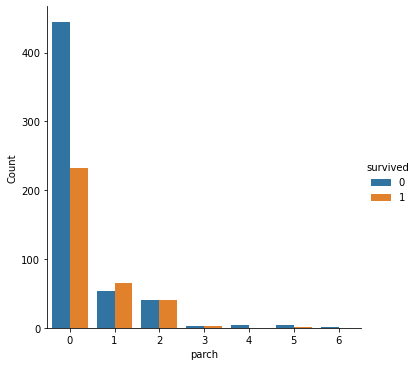

In [35]:
d = df.groupby(by = ['survived',"parch"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='parch',y='Count',hue='survived',data=d,kind='bar')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
   survived embarked  Count
0         0        C     75
1         0        Q     47
2         0        S    427
3         1        C     93
4         1        Q     30
5         1        S    217


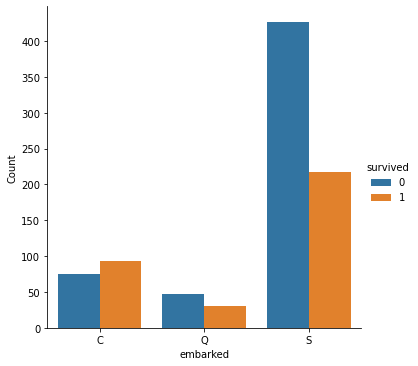

In [36]:
d = df.groupby(by = ['survived',"embarked"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='embarked',y='Count',hue='survived',data=d,kind='bar')

   survived    who  Count
0         0  child     34
1         0    man    449
2         0  woman     66
3         1  child     49
4         1    man     88
5         1  woman    205


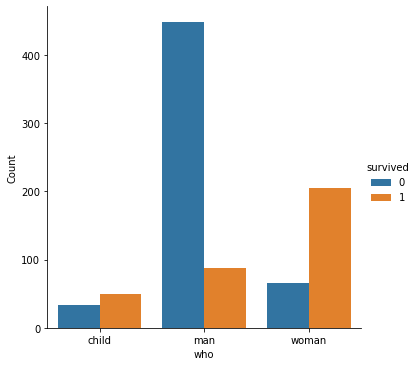

In [37]:
d = df.groupby(by = ['survived',"who"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='who',y='Count',hue='survived',data=d,kind='bar')

    survived deck  Count
0          0    A      8
1          0    B     12
2          0    C     24
3          0    D      8
4          0    E      8
5          0    F      5
6          0    G      2
7          1    A      7
8          1    B     35
9          1    C     35
10         1    D     25
11         1    E     24
12         1    F      8
13         1    G      2


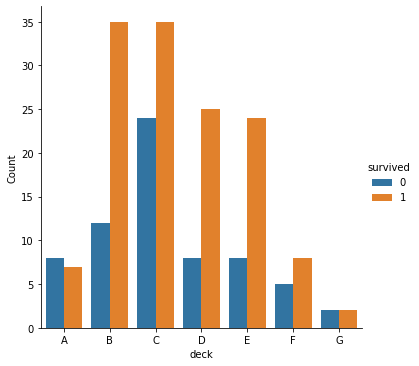

In [38]:
d = df.groupby(by = ['survived',"deck"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='deck',y='Count',hue='survived',data=d,kind='bar')

   survived  alone  Count
0         0  False    175
1         0   True    374
2         1  False    179
3         1   True    163


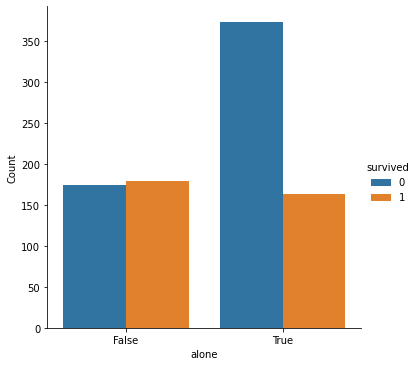

In [39]:
d = df.groupby(by = ['survived',"alone"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='alone',y='Count',hue='survived',data=d,kind='bar')

- cat vs cont

In [40]:
# making bins for age
bins = [0,20,40,60,150]
group = ['0to20','20to40','40to60','60+']
# create  a new column for age bin
df['ageBin'] = pd.cut(df['age'],bins,labels=group)

In [41]:
df[['age','ageBin']].sample(10)

,age,ageBin
472,33.00,20to40
850,4.00,0to20
704,26.00,20to40
98,34.00,20to40
794,25.00,20to40
431,NaN,NaN
651,18.00,0to20
60,22.00,20to40
634,9.00,0to20
78,0.83,0to20


   survived  ageBin  Count
0         0   0to20     97
1         0  20to40    232
2         0  40to60     78
3         0     60+     17
4         1   0to20     82
5         1  20to40    153
6         1  40to60     50
7         1     60+      5


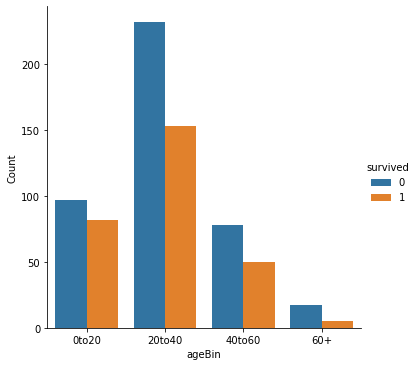

In [42]:
d = df.groupby(by = ['survived',"ageBin"],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='ageBin',y='Count',hue='survived',data=d,kind='bar')

In [43]:
bins = [0.0,100.0,200.0,300.0,600.0]
group = ['VeryLow','Low','Medium','High']
df['fareBin'] = pd.cut(df['fare'],bins,labels=group)

In [44]:
df[['fare','fareBin']].sample(10)

,fare,fareBin
448,19.2583,VeryLow
339,35.5000,VeryLow
698,110.8833,Low
641,69.3000,VeryLow
105,7.8958,VeryLow
668,8.0500,VeryLow
796,25.9292,VeryLow
325,135.6333,Low
732,0.0000,NaN
375,82.1708,VeryLow


   survived  fareBin  Count
0         0  VeryLow  521.0
1         0      Low    8.0
2         0   Medium    6.0
3         0     High    NaN
4         1  VeryLow  302.0
5         1      Low   25.0
6         1   Medium   11.0
7         1     High    3.0


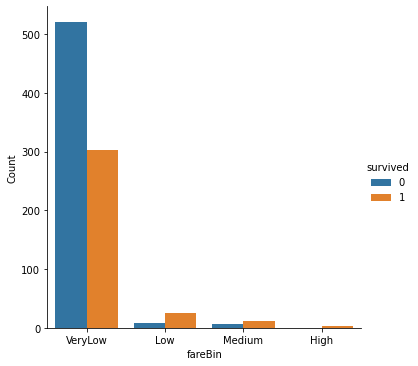

In [45]:
d = df.groupby(by = ['survived','fareBin'],as_index=False)['index'].count()
d.rename(columns={'index':'Count'},inplace=True)
print(d)
sns.catplot(x='fareBin',y='Count',hue='survived',data=d,kind='bar')

- cont vs cont

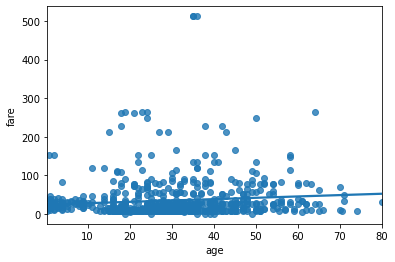

In [46]:
sns.regplot(x='age',y='fare',data=df,ci=False)

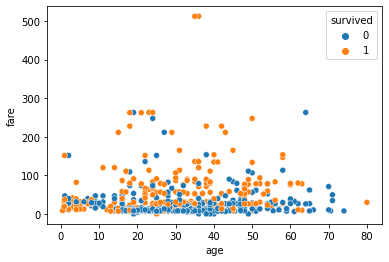

In [47]:
sns.scatterplot(x='age',y='fare',hue='survived',data=df)

### Data Wrangling

In [48]:
df.isnull().sum()

index         0
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
alone         0
ageBin      177
fareBin      15
dtype: int64

In [49]:
df.drop(columns=['ageBin','fareBin','index'],inplace=True)

In [50]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
alone         0
dtype: int64

In [51]:
# Deck has too many null values so dropping that column
df.drop(columns=['deck'],inplace=True)

In [52]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [53]:
# imputing median value in place of null values in age column
df['age'].fillna(df['age'].median(),inplace=True)

In [54]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64

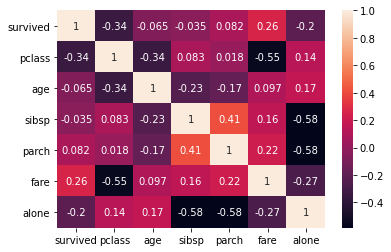

In [55]:
sns.heatmap(df.corr(),annot=True)

In [56]:
df.to_csv("titanic.csv",index=False)